As introducted in the topic *[Pandas] Data Cleaning*, clean data is used as the input for analytical tasks. However, to build a good predictive model (in both performance and computation), a lot more works need to be done in order to improve data quality. These kind of tasks are called *feature engineering*, they get data into the appropriate format and reveal hidden insights.

*Feature engineering* tasks are technically simple, but they do require some domain knowledge. This makes *feature engineering* more of an art than a science.

# 1. Data preprocessing

## 1.1. Scaling
Scaling is a preprocessing technique defined only on numerical variables, where the scaled variable distributes the same as the original one but does have specific properties.
- *Min-max scaling*: to have the min of $0$ and max of $1$
- *Standardization*: to have the mean of $0$ and standard deviation of $1$
- *Manhattan normalization*: to have the absolute values sum up to $1$
- *Euclidean normalization*: to have the squared values sum up to $1$

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

### Min-max scaling
Many Machine Learning algorithms assume all variables are on the same scale, typically $[0;1]$. The formula for rescaling to $[a;b]$ is:

$$\mathbf{x}\leftarrow\frac{\mathbf{x}-\mathbf{x}_{min}}{\mathbf{x}_{max}-\mathbf{x}_{min}}(b-a)+a$$

In [7]:
df = pd.DataFrame({
    'x': [17, 22, 25, 30, 38],
    'y': [75, 81, 32, 23, 55]
})

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(df.values)
df_scaled = pd.DataFrame(data_scaled, columns=['x_scaled', 'y_scaled'])

df.join(df_scaled)

,x,y,x_scaled,y_scaled
0,17,75,0.000000,0.896552
1,22,81,0.238095,1.000000
2,25,32,0.380952,0.155172
3,30,23,0.619048,0.000000
4,38,55,1.000000,0.551724


### Standardization
Also called *z-score* scaling, it is a technique that transforms a variable so that it has a mean of $0$ and a standard deviation of $1$. Standardization is strongly recommended as the default method for data preprocessing. The formula for standardizing $x$ is:

$$\mathbf{x}\leftarrow\frac{\mathbf{x}-\mu_\mathbf{x}}{\sigma_\mathbf{x}}$$

In [9]:
df = pd.DataFrame({
    'x': [17, 22, 25, 30, 38],
    'y': [75, 81, 32, 23, 55]
})

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.values)
df_scaled = pd.DataFrame(data_scaled, columns=['x_scaled', 'y_scaled'])

df.join(df_scaled)

,x,y,x_scaled,y_scaled
0,17,75,-1.310622,0.953649
1,22,81,-0.613483,1.216121
2,25,32,-0.195199,-0.927401
3,30,23,0.501940,-1.321110
4,38,55,1.617363,0.078742


### Normalizing
This technique ensures the vector has a total length of 1. The length can be either Manhattan distance (L1) $\|\mathbf{x}\|_1 = |x_1|+|x_2|+\dots+|x_n|$ or Euclidean distance (L2) $\|\mathbf{x}\|_2 = \sqrt{x_1^2+x_2^2+\dots+x_n^2}$. The formula for normalizing is:

$$\mathbf{x}\leftarrow\frac{\mathbf{x}}{\|\mathbf{x}\|}$$

In [12]:
df = pd.DataFrame({
    'x': [17, 22, 25, 30, 38],
    'y': [75, 81, 32, 23, 55]
})

scaler = Normalizer(norm='l1')
data_scaled = scaler.fit_transform(df.values.T).T
df_scaled = pd.DataFrame(data_scaled, columns=['x_scaled', 'y_scaled'])

df.join(df_scaled)

,x,y,x_scaled,y_scaled
0,17,75,0.128788,0.281955
1,22,81,0.166667,0.304511
2,25,32,0.189394,0.120301
3,30,23,0.227273,0.086466
4,38,55,0.287879,0.206767


In [4]:
df = pd.DataFrame({
    'x': [17, 22, 25, 30, 38],
    'y': [75, 81, 32, 23, 55]
})

scaler = Normalizer(norm='l2')
data_scaled = scaler.fit_transform(df.values.T).T
df_scaled = pd.DataFrame(data_scaled, columns=['x_scaled', 'y_scaled'])

df.join(df_scaled)

,x,y,x_scaled,y_scaled
0,17,75,0.277905,0.579259
1,22,81,0.359642,0.625599
2,25,32,0.408684,0.247150
3,30,23,0.490421,0.177639
4,38,55,0.621200,0.424790


## 1.2. Mathematical transformation
Sometimes real world data distribute not very nice, while most transformation techiniques do not affect the distribution. Imagine the label in a regression problem is mostly small values, then Machine Learning algorithms will have a hard time *learning* higher values. By taking advantage of mathematical functions, Data Scientists can control the distribution of data to make them more *nature*.

This section covers the most notable transformations. Some other basic and popular ones are:
- *Reciprocal* transformation: $\mathbf{x}=\mathbf{x}^{-1}$
- *Square root* transformation: $\mathbf{x}=\sqrt{\mathbf{x}}$
- *Exponential* transformation: $\mathbf{x}=e^{\mathbf{x}}$

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import skewnorm, boxcox, yeojohnson
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Logarithmic transformation
This popular technique has the ability to make right skewed data to distribute normally. The formula of the transformation is:

$$\mathbf{x}\leftarrow\log_b{(\mathbf{x}+1)}$$

Some notable tips when using log transformation:
- It works only on features contain all postive values.
- Different base values $b$ can be used, the most common ones are: $e$, $2$ and $10$.
- The quantity $1$ is added to $\mathbf{x}$ to make sure the values after the transformation are all positive, since $\log{(x+1)}>\log1=0$.

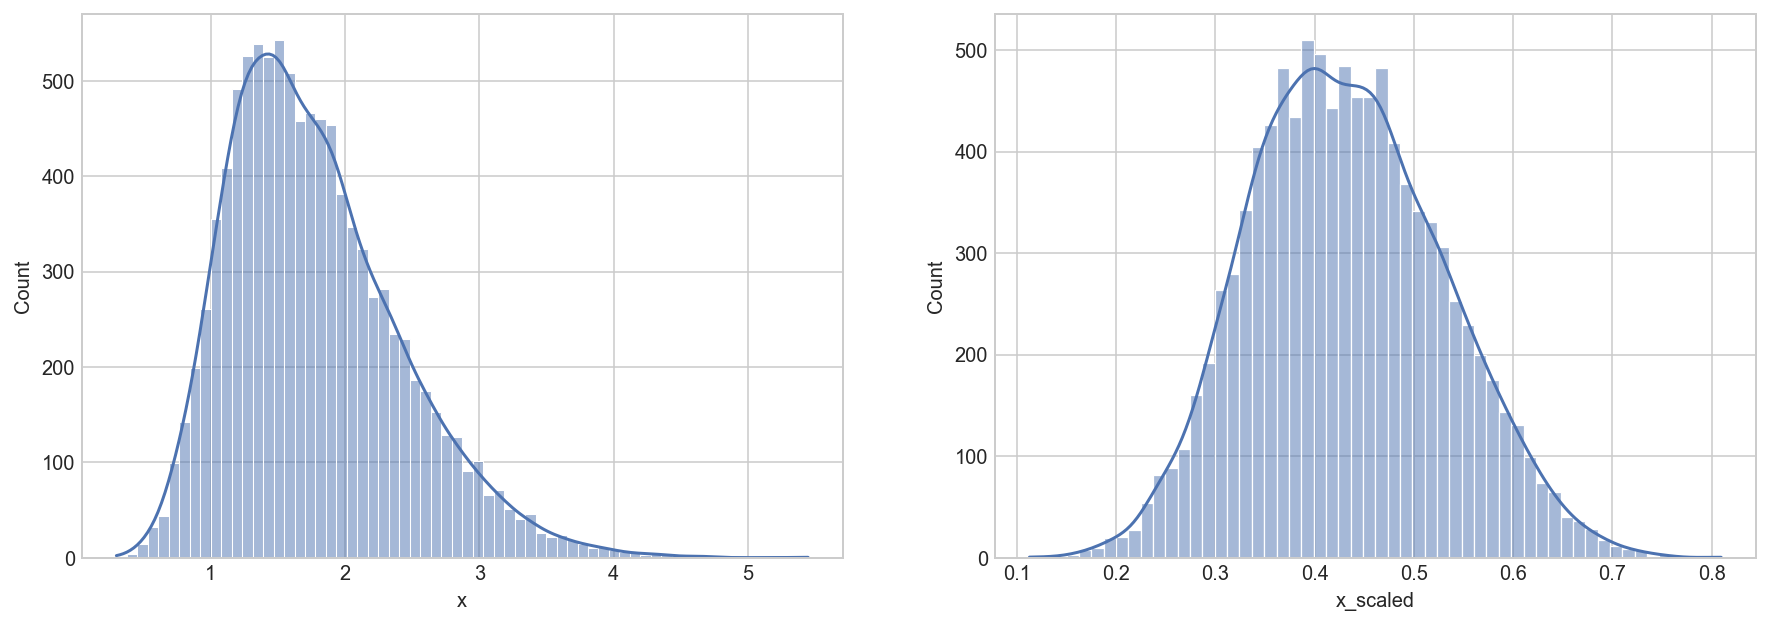

In [10]:
df = pd.DataFrame({'x': skewnorm.rvs(a=4, loc=1, size=10000)})
df = df.assign(x_scaled=np.log10(df.x+1))

fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df.x, ax=ax[0], kde=True, edgecolor='w')
sns.histplot(df.x_scaled, ax=ax[1], kde=True, edgecolor='w')
plt.show()

### Box-Cox transformation
Box-Cox function is a member of power functions family. It has the effect of making data more normal distribution-like. The transformation is given by a *piecewise function* as below:

$$\mathbf{x}\leftarrow
\begin{cases}
    {\dfrac {\mathbf{x}^{\lambda}-1}{\lambda}}&{\text{if }}\lambda\neq 0\\
    \ln\mathbf{x}&{\text{if }}\lambda=0
\end{cases}
$$

By default, the `scipy.stats.boxcox` function estimates the value of $\lambda$ that maximizes the log-likelihood function.

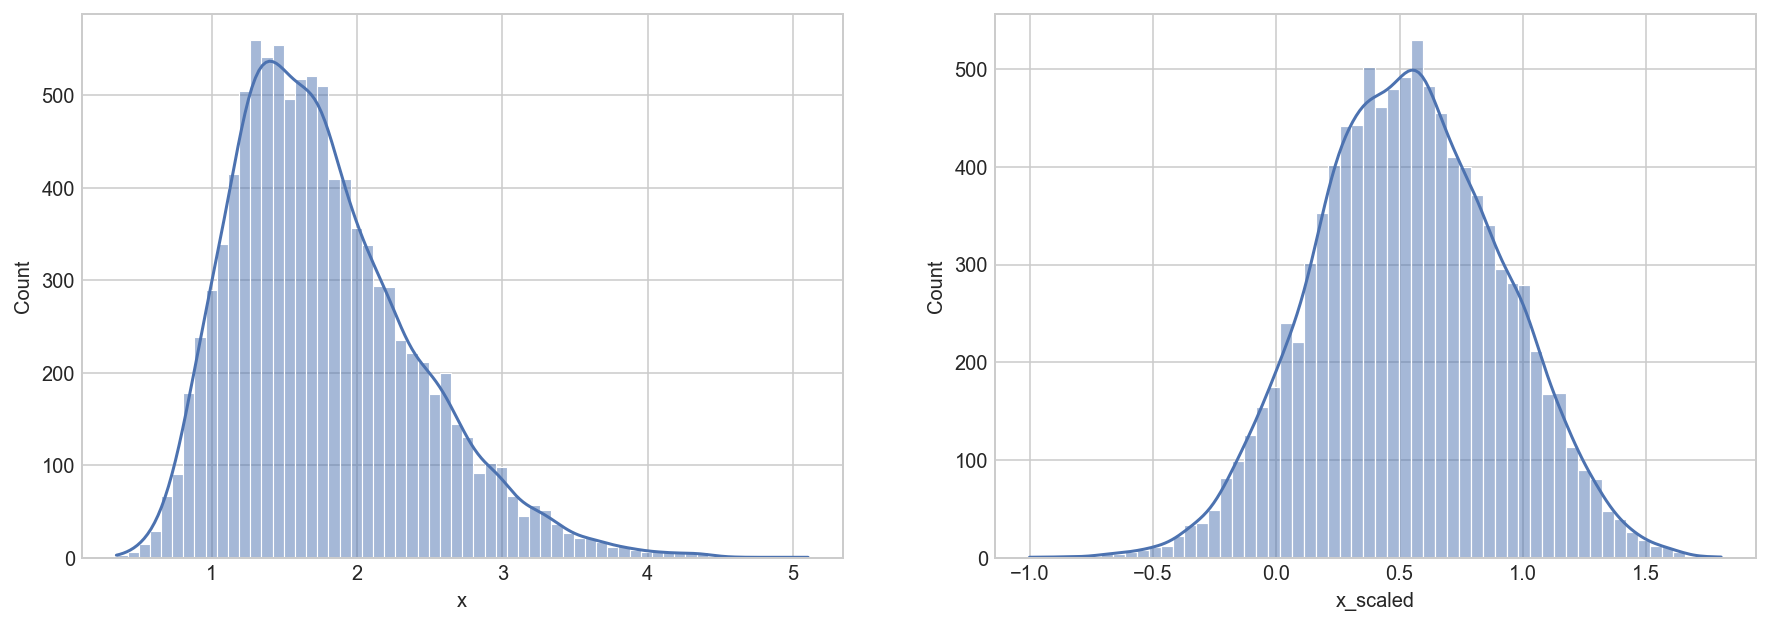

In [11]:
df = pd.DataFrame({'x': skewnorm.rvs(a=4, loc=1, size=10000)})
df = df.assign(x_scaled=boxcox(df.x)[0])

fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df.x, ax=ax[0], kde=True, edgecolor='w')
sns.histplot(df.x_scaled, ax=ax[1], kde=True, edgecolor='w')
plt.show()

In [12]:
x = np.array([1, 2, 3, 4])
boxcox(x)

(array([0.        , 0.87906495, 1.61395204, 2.26850639]), 0.660463361413373)

In [13]:
x = 2
ld = 0.660463

(x**ld - 1)/ld

0.8790648325641579

### Yeo-Johnson transformation

## 1.2. Bucketizing
Bucketizing (or binning) refers to the tasks that put data into larger bins. Doing bucketizing means sacrifying information, however it makes data more regularized and thus prevents overfitting. Either numerical and categorical variables can be binned.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

### Discretizating

In [34]:
df = pd.DataFrame({'x': [17, 22, 25, 30, 38]})

group = pd.cut(
    df.x,
    bins=[0, 20, 30, 100],
    right=False,
    labels=['A', 'B', 'C'])

df.assign(group=group)

,x,group
0,17,A
1,22,B
2,25,B
3,30,C
4,38,C


### Clustering

In [48]:
np.random.seed(1)
df = pd.DataFrame({
    'x': np.random.randint(10, 100, size=10),
    'y': np.random.randint(10, 100, size=10)
})

clusterer = KMeans(3, random_state=0)
group = clusterer.fit_predict(df.values)

df.assign(group=group)

,x,y,group
0,47,86,2
1,22,81,2
2,82,16,1
3,19,35,0
4,85,60,1
5,15,30,0
6,89,28,1
7,74,94,2
8,26,21,0
9,11,38,0


### Mapping

In [2]:
df = pd.DataFrame({'x': ['England', 'France', 'Germany', 'Korea', 'Japan']})

x_map = df.x.map({
    'England': 'Europe', 'France': 'Europe', 'Germany': 'Europe',
    'Korea': 'Asia', 'Japan': 'Asia'
})

df.assign(x_map=x_map)

,x,x_map
0,England,Europe
1,France,Europe
2,Germany,Europe
3,Korea,Asia
4,Japan,Asia


## 1.3. Encoding
Encoding is the technique that transforms a categorical variable to numerical variables.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

### Mapping
Mapping is used to transform ordinal data to numerical data.

In [16]:
df = pd.DataFrame({
    'x': ['Low', 'Medium', 'High', 'High', 'Medium']
})

x_encoded = df.x.map({'Low': 1, 'Medium': 2, 'High': 3})

df.assign(x_encoded=x_encoded)

,x,x_encoded
0,Low,1
1,Medium,2
2,High,3
3,High,3
4,Medium,2


### One-hot encoding
This technique is used to transform nominal data to numerical data.

In [15]:
df = pd.DataFrame({
    'x': ['Apple', 'Apple', 'Orange', 'Mango', 'Apple']
})

encoder = LabelBinarizer()
x_encoded = pd.DataFrame(
    data=encoder.fit_transform(df.x.values.reshape(-1,1)),
    columns=encoder.classes_)

df.join(x_encoded)

,x,Apple,Mango,Orange
0,Apple,1,0,0
1,Apple,1,0,0
2,Orange,0,0,1
3,Mango,0,1,0
4,Apple,1,0,0


# 2. Dimensionality reduction

### The curse of dimensionality

## 2.1. Feature selection
Feature selection refers to the tasks that remove low quality data, hence keep informative features. It helps reduce noises and computational cost. Here are some feature selection techniques, they can be implemented very easily.

### Filter methods
Filter methods use Descriptive Statistics to decide which feature to be filtered out.

- *Missing ratio evaluation*. Features having more than 40-50% of missing values can be dropped.

- *Low variance filtering*. Think about a constant feature, whose all observations have the same value, it has no predictive power and cannot explain the target variable. Therefore, features with very low variance can be safely removed.

- *High correlation filtering*. A pair of features having a high Pearson's correlation coefficient means they are very similar to each other, and they will bring the same information to the predictive model. Such a situation is call *multi-colinearity*, and it can mislead some Machine Learning algorithms. Therefore, only 1 variable in the high correlated pair should be used.

### Wrapper methods
Wrapper methods run Machine Learning algorithms on a subsets of the dataset to detect unimporatant features.

- *Feature importances analysis*. Some ML algorithms have the ability to return feature importances. For example, Linear Regression uses variable weights and Decision Tree uses sum of information gains. Feature importances express how much information features contribute on predicting the target variable. In this approach, low important features will be removed.

- *Backward feature elimination*. The idea of this technique is to fit an algorithm on all input variables and consecutively remove one feature at a time that worst reduces model score. This procedure stops when model score no longer changes.

- *Foward feature construction*. This is basically the inverse process of the previous techique, it fits model and evaluate the results untill all significant features have been visited. Both backward elimination and foward construction are greedy algorithms, therefore they are not suite for large scale data.

# 3. Feature synthesis

# 4. ML pipeline 

A data sciece project has multiple steps of getting data, cleaning, transforming, modelling and evalutating the model. To make the complicated process to become easier, sklearn provide the [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) module. The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. It also can be reused for different dataset in the future

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error as MSE, mean_absolute_error as MAE
from sklearn.linear_model import Lasso

***Regression***

In [48]:
boston = pd.read_csv('data/boston.csv')
boston.head()

,crime_rate,land_rate,indus,chas,nox,room,age,distance,radial,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [49]:
y = boston['price']
x = boston.drop(columns='price')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [50]:
# preprocessing data
preproc_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

# modelling

lasso_pipeline = Pipeline(steps=[
    ('preprocess', preproc_pipeline),
    ('model', Lasso(alpha=0.1))
])

In [51]:
lasso_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('impute', SimpleImputer()),
                                 ('scale', StandardScaler())])),
                ('model', Lasso(alpha=0.1))])

In [52]:
print('MAE testing: ',MAE(y_test, lasso_pipeline.predict(x_test)))
print('R-squared testing: ',lasso_pipeline.score(x_test, y_test))
print('R-squared training: ',lasso_pipeline.score(x_train, y_train))

MAE testing:  3.1906614748079933
R-squared testing:  0.7812235029603349
R-squared training:  0.7124263735572877


In [53]:
# Using with gridsearch
search = make_pipeline(preproc_pipeline,
                       GridSearchCV(Lasso(), 
                                    param_grid =  {'alpha': np.logspace(-5, 5, 11)}, 
                                    cv=5, 
                                    scoring='neg_mean_absolute_error'))

search.fit(x_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('impute', SimpleImputer()),
                                 ('scale', StandardScaler())])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=Lasso(),
                              param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
                              scoring='neg_mean_absolute_error'))])

In [54]:
print('Best score:', abs(search.score(x_test, y_test)))

Best score: 3.1906614748079933


***Classification***

In [31]:
from sklearn.datasets import load_breast_cancer

In [32]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [44]:
# preprocessing data
preproc_pipeline = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=5)),
    ('scale', MinMaxScaler())
])

tree_pipeline = Pipeline(steps=[
    ('preprocess', preproc_pipeline),
    ('model', DecisionTreeClassifier())
])
# gridsearch with preprocessing
params = {
    'preprocess__impute__n_neighbors':range(3,5),
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': range(5,8),
}


search = GridSearchCV(tree_pipeline, params, 
                      cv=5, 
                      scoring='roc_auc')

In [45]:
search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        Pipeline(steps=[('impute',
                                                         KNNImputer()),
                                                        ('scale',
                                                         MinMaxScaler())])),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': range(5, 8),
                         'preprocess__impute__n_neighbors': range(3, 5)},
             scoring='roc_auc')

In [46]:
search.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 5,
 'preprocess__impute__n_neighbors': 3}

In [47]:
print('auc of train: ',search.score(x_train, y_train))
print('auc of test: ',search.score(x_test, y_test))

auc of train:  0.9996341165948451
auc of test:  0.9131349782293179


***Multiple models***

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [61]:
from sklearn.base import BaseEstimator
class ClfSwitcher(BaseEstimator):
    def __init__(
        self, 
        estimator = DecisionTreeClassifier(),
    ):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 
    
        self.estimator = estimator
    
    
    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self
    
    
    def predict(self, X, y=None):
        return self.estimator.predict(X)
    
    
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    
    
    def score(self, X, y):
        return self.estimator.score(X, y)

In [67]:
# preprocessing data
pipeline = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=5)),
    ('scale', MinMaxScaler()),
    ('model',ClfSwitcher())])

parameters = [
    {'model__estimator': [RandomForestClassifier()],
    'model__estimator__n_estimators': [80,90,100]},
    {'model__estimator': [DecisionTreeClassifier()],
    'model__estimator__criterion':['gini','entropy']}
]

gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, verbose=3, scoring='f1')
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('impute', KNNImputer()),
                                       ('scale', MinMaxScaler()),
                                       ('model', ClfSwitcher())]),
             n_jobs=12,
             param_grid=[{'model__estimator': [RandomForestClassifier(n_estimators=90)],
                          'model__estimator__n_estimators': [80, 90, 100]},
                         {'model__estimator': [DecisionTreeClassifier()],
                          'model__estimator__criterion': ['gini', 'entropy']}],
             scoring='f1', verbose=3)

In [68]:
gscv.best_params_

{'model__estimator': RandomForestClassifier(n_estimators=90),
 'model__estimator__n_estimators': 90}

In [69]:
gscv.best_score_

0.9741500220673412

In [70]:
gscv.score(x_test, y_test)

0.9714285714285713

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*